In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')#colour pattern ko show karta hai
%matplotlib inline 

In [2]:
ratings_data=pd.read_csv("ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movie_names=pd.read_csv("movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movie_data=pd.merge(ratings_data,movie_names,on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
#create a dataframe for analysis
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


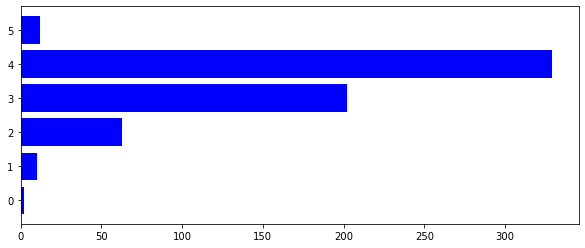

In [7]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

<ipython-input-8-bd3670a39b7b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")


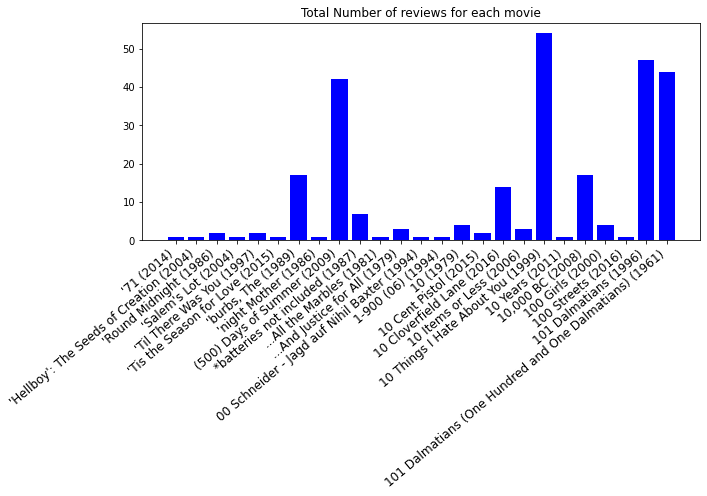

In [8]:
#a bar graph descibibg number of reviews for first 25 movies
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='b')
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

In [9]:
# Calculate mean rating of all movies and check the popular high rating movies
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64